# The solow model and the solow model with human capital 

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [133]:
import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

# output
sm.init_printing(use_unicode=True)

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# output
sm.init_printing(use_unicode=True)

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The basic solow Model 

**Write out the model in equations here.** 

In the basic solow model we have:

$K_t$ as capital\
$L_t$ as labor\


The model also contains\
The GDP\
$Y_t =F(K_t,L_t)$\
$Y_t= B*K_t^\alpha*L_1^{1-\alpha}$\
$r_t=\alpha*B*\left(\frac{K_t}{K_t}\right)$\
$w_t=(1-\alpha) B\left(\frac{K_t}{L_t}\right)^{\alpha}$\
The savings\
$S_t=sY_t,s \in (0,1)$\
$K_{t+1}-K_t=S_t-\delta K_t$\
where we have: $k_t=S_t+(1-\delta)K_t$\
$L_{t+1}=(1+n)L_t$

In the basic solow model we can use this notation for per capita.\

$y_t=\left(\frac{Y_t}{L_t}\right)$\
$k_t=\left(\frac{K_t}{L_t}\right)$
    

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [134]:
#Define parameter and symbols
n,s,B,k,kstar,ystar,alpha,delta=sm.symbols('n s B k k^* y^* alpha delta')

#Here we will solve the equation for k
Solow_eq = sm.Eq(((s*B*k**alpha-(n + delta)*k)/(1 + n)),0)

#Now it is possible to find the steady-state for k 
k_s=sm.solve(Solow_eq,k)[0]
s_s_k=sm.Eq(kstar,k_s)

# Define y 
y=B*k**alpha

# Find the steady state for y
y_s=y.subs(k,k_s)
s_s_y=sm.Eq(ystar,y_s)

#print equation 
display(s_s_k)
display(s_s_y)

               -1  
              ─────
              α - 1
       ⎛ B⋅s ⎞     
k__* = ⎜─────⎟     
       ⎝δ + n⎠     

                       α
         ⎛        -1  ⎞ 
         ⎜       ─────⎟ 
         ⎜       α - 1⎟ 
         ⎜⎛ B⋅s ⎞     ⎟ 
y__* = B⋅⎜⎜─────⎟     ⎟ 
         ⎝⎝δ + n⎠     ⎠ 

In [135]:
#Turn the equation into function in python
k_s_f= sm.lambdify((alpha, delta, B, n, s), k_s)

In [136]:
#Define the value of the parameteres in the model
n= 0.025
alpha=1/3
delta=0.05
s=0.3
B=1


In [137]:
#The steady state value for k
k_s_v = k_s_f(alpha, delta, B, n, s)

# Print the steady state value for k with the values of the parameters
ss_k_v = sm.Eq(kstar, k_s_v)
sm.pprint(ss_k_v)

k__* = 7.99999999999999


Now it is possible to find the value for y in steady state by using the steady state value for k 

In [138]:
# The steady-state value for y 
y_s_v = B * k_s_v**alpha

# Print the steady state value for y with the values of the parameters
ss_y_e = sm.Eq(ystar, y_s_v)
sm.pprint(ss_y_e)

y__* = 2.0


## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [139]:
def solow_s_s_k(n: float, s: float, B: float, alpha: float, delta: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Output elasticity wrt capital
    delta: Physical capital depreciation rate
    s    : Savings rate
    n    : Population growth
    B    : Productivity parameter
    """

    # The solow euqation
    solow_eq = lambda k: s * B * k**alpha - (n + delta) * k
    
    # optimize
    return optimize.bisect(solow_eq, 1, 100)

k_star = solow_s_s_k(n, s, B, alpha, delta)
print(f'k* = {k_star:.3f}')

k* = 8.000


In [140]:
# Define function to plot Solow diagram
def plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float):
    # Calculate the growth rates of capital per capita and the diagonal line
    k_growth = [s * B * t**alpha for t in range(kt_xmax + 1)]
    diagonal = [(n + delta) * t for t in range(kt_xmax + 1)]

    # Calculate steady state capital per capita
    k_star = ((s*B)/(n+delta))**(1/(1-alpha))

    # Configure plot settings
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(8, 6))
    plt.plot(k_growth, label=r'$sBk_t^{\alpha}$', color='darkorange')
    plt.plot(diagonal, label=r'$(n+\delta)k_t$', color='black')
    plt.axvline(x=k_star, linestyle='--', color='red', label=r'$k*$')
    plt.axvline(x=kt_vline, linestyle='--', color='green', label=r'$k_t$')
    plt.xlim(0, kt_xmax)
    plt.xlabel('Capital per capita, $k_t$')
    plt.ylabel('')
    plt.legend()
    plt.title('Figure 1: Solow Diagram')
    plt.grid(True)  # add grid
    
    # Add arrows to the plot
    arrow_len = abs(k_star - kt_vline)
    arrow_positions = [0.3, 0.6, 0.8, 0.9, 0.95, 1]
    
    # If kt_vline is to the left of k_star, flip the direction of the arrows
    if kt_vline < k_star:
        arrow_len = -arrow_len
        arrow_positions = [1 - pos for pos in arrow_positions]
    else:
        arrow_positions = [1 - pos for pos in arrow_positions]
    
    arrow_center = min(k_star, kt_vline) + abs(arrow_len) / 2
    
    # Add each arrow to the plot
    for pos in arrow_positions:
        arrow_x = arrow_center + arrow_len * (pos - 0.5)
        plt.annotate(
            '',
            xy=(kt_vline, 0), xycoords='data',
            xytext=(arrow_x, 0), textcoords='data',
            arrowprops=dict(
                arrowstyle="<-", color="black", lw=1, mutation_scale=15
            )
        )

    # print plot
    plt.show()

# Create an interactive widget to display the Solow diagram
widgets.interact(
    plot_solow_diagram,
    k=widgets.fixed(0),
    alpha=widgets.FloatSlider(description=r'α', min=0, max=0.9, step=0.05, value=0.3, layout=widgets.Layout(width='50%')),
    delta=widgets.FloatSlider(description=r'δ', min=0, max=0.1, step=0.01, value=0.01, layout=widgets.Layout(width='50%')),
    s=widgets.FloatSlider(description='s', min=0.01, max=0.8, step=0.05, value=0.4, layout=widgets.Layout(width='50%')),
    n=widgets.FloatSlider(description='n', min=0.01, max=0.1, step=0.005, value=0.01, layout=widgets.Layout(width='50%')),
    B=widgets.fixed(1),
    kt_xmax=widgets.IntSlider(description='k_t axis', min=1, max=100, step=10, value=100, layout=widgets.Layout(width='50%')),
    kt_vline=widgets.FloatSlider(description='k_t', min=0, max=100, step=0.1, value=20, layout=widgets.Layout(width='50%'))
)

interactive(children=(FloatSlider(value=0.01, description='n', layout=Layout(width='50%'), max=0.1, min=0.01, …

<function __main__.plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float)>

The plot shows how different parameter values changes the steady state. The savings rate and the alpha parameter affects the steady state positively, while population growth and the depriciation rate affects the steady state negatively. 

# Solow Model with Human Capital

In [141]:
n,g,s_k,s_h,k,h,alpha,phi,delta=sm.symbols('n g s_k s_h k h alpha phi delta')

In [142]:
#the steady state 
ss1 = sm.Eq((s_k*k**alpha*h**phi+(1-delta)*k)/((1+n)*(1+g)), k)
ss2 = sm.Eq((s_h*k**alpha*h**phi+(1-delta)*h)/((1+n)*(1+g)), h)
ss1

 φ  α                   
h ⋅k ⋅sₖ + k⋅(1 - δ)    
──────────────────── = k
  (g + 1)⋅(n + 1)       

In [143]:
#The steady state for k

ss_k = sm.Eq((s_k*k**alpha*h**phi+(1-delta)*k)/((1+n)*(1+g)), k) 
ss_k




 φ  α                   
h ⋅k ⋅sₖ + k⋅(1 - δ)    
──────────────────── = k
  (g + 1)⋅(n + 1)       

In [144]:
#The steady state for h
ss_h = sm.Eq((s_h*k**alpha*h**phi+(1-delta)*h)/((1+n)*(1+g)), h)
ss_h


             φ  α       
h⋅(1 - δ) + h ⋅k ⋅sₕ    
──────────────────── = h
  (g + 1)⋅(n + 1)       

In [145]:
#Finding steady state for physical and human capital:
sss_k= sm.solve((ss_k, ss_h),(k,h), implicit = True, manual = True)
sss_k


⎧        φ  α                φ  α      ⎫
⎪       h ⋅k ⋅sₕ            h ⋅k ⋅sₖ   ⎪
⎨h: ───────────────, k: ───────────────⎬
⎪   δ + g⋅n + g + n     δ + g⋅n + g + n⎪
⎩                                      ⎭

In [146]:
#Solution as a Python function:
ss_func = sm.lambdify((s_h,s_k,g,n,alpha,phi,delta,h,k),sss_k)


In [147]:
#Define the value of the parameteres in the model
n= 0.01
g=0.02
alpha=1/3
delta=0.06
phi=1/3
s_k=0.1
s_h=0.1


In [148]:
#Defining function for Human capital: 
def solow_h_function(k: float, s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float, h: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Return on physical capital
    phi  : Reuturn on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    k    : Physical capital
    h    : Human capital
    """

    #Returning transition equation for human capital:

    return 1/((1+n)*(1+g))*(s_h*k**(alpha)*h**(phi)+(1-delta)*h)-h



In [149]:
#Defining function for Physical capital: 
def solow_k_function(h: float, s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float, k: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Return on physical capital
    phi  : Reuturn on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    k    : Physical capital
    h    : Human capital
    """

    #Returning transition equation for physical capital:

    return 1/((1+n)*(1+g))*(s_k*k**(alpha)*h**(phi)+(1-delta)*k)-k


In [150]:
#Defining function for Human capital and Physical capital functions, together with vectors in place of the endogenous variables
func = lambda x: [solow_h_function(x[1],s_h,s_k,g,n,alpha,phi,delta,x[0]),solow_k_function(x[0],s_h,s_k,g,n,alpha,phi,delta,x[1])]


In [151]:
#Solving the vector functions:
solution = optimize.root(func,[1,1],method = 'broyden1')


In [152]:
#The numerical solution:
NumericalSolution = solution.x

print(f'Numerical solution is: k* = {NumericalSolution[1]:.3f}, h* = {NumericalSolution[0]:.3f}')


Numerical solution is: k* = 0.119, h* = 0.119


Phase diagram

In [153]:
#Function expressing the nullclines: 
def ss_0(s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float) -> float:
    """

    Args :
    alpha: Return on physical capital
    phi  : Return on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    h    : Human capital
    k    : Physical capital

    Returns:
    Nullclines for physical and human capital
    """
    
    # a. grids
    k_vec = np.linspace(1e-4,3,500)
    h_vec_DeltaK0 = np.empty(500)
    h_vec_DeltaH0  = np.empty(500)

    # b. solve for each k in grid
    for i,k in enumerate(k_vec):
        #Solve for delta_h=0
        
        # i. objective
        obj = lambda h: -solow_h_function(k,s_h,s_k,g,n,alpha,phi,delta,h)
        # ii. optimizer
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])
        
        h_vec_DeltaH0[i] = result.root

       
        #Solve for delta_k=0
        # i. objective
        obj = lambda h: -solow_k_function(h,s_h,s_k,g,n,alpha,phi,delta,k)

        # ii. optimizer
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])

        h_vec_DeltaK0[i] = result.root

    return k_vec, h_vec_DeltaK0, h_vec_DeltaH0

#Solve the function
k_vec, h_vec_DeltaK0, h_vec_DeltaH0 = ss_0(s_h,s_k,g,n,alpha,phi,delta)


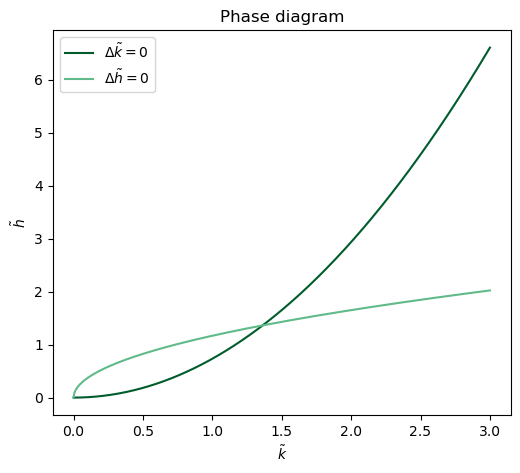

In [172]:
#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(k_vec,h_vec_DeltaK0, label=r'$\Delta \tilde{k}=0$', c='#005c2b')
ax.plot(k_vec,h_vec_DeltaH0, label=r'$\Delta \tilde{h}=0$', c='#61ba89')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylabel(r'$\tilde{h}$')
ax.legend() 

#We mark the steady state
#plt.scatter(sol.x[1],sol.x[0],color='black',s=80,zorder=2.5)

ax.set_title('Phase diagram');


# Policy experiement: Permanently increasing the investment rate in human capital $s_H$

In [162]:
from matplotlib.lines import Line2D

In [175]:


def plot_combinations_new(s_k, s_h, alpha, phi, n, g, delta):
    # steady state expressions to find intersections (such that they can be plotted)
    ktilde_ss = ((s_k ** (1 - phi) * s_h ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htilde_ss = ((s_k ** alpha * s_h ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    ktildenew_ss = ((s_k ** (1 - phi) * (s_h * 1.3) ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htildenew_ss = ((s_k ** alpha * (s_h * 1.3) ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    
    # create grids
    ktilde_values = np.linspace(0.01, 2 * ktilde_ss, 100)
    htilde_values = np.linspace(0.01, 2 * htilde_ss, 100)
    Ktilde, Htilde = np.meshgrid(ktilde_values, htilde_values)
    
    # create null-clines for ktilde and htilde
    delta_ktilde = (1 / ((1 + n) * (1 + g))) * (s_k * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Ktilde)
    delta_htilde = (1 / ((1 + n) * (1 + g))) * (s_h * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)
    delta_htildenew = (1 / ((1 + n) * (1 + g))) * (s_h * 1.3 * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)

    # The elements in the plot
    plt.figure(figsize=(8, 8))
    plt.contour(Ktilde, Htilde, delta_ktilde, levels=[0], colors=['blue'])
    plt.contour(Ktilde, Htilde, delta_htilde, levels=[0], colors=['red']) 
    plt.contour(Ktilde, Htilde, delta_htildenew, levels=[0], colors=['purple']) 
    plt.plot([],[],[])
    
    #Initial equilibrium steady state
    plt.scatter(ktilde_ss, htilde_ss, color='green', marker='o', zorder=3)
    plt.annotate("E1", (ktilde_ss, htilde_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)
    
    #New equilibriumsteady state
    plt.scatter(ktildenew_ss, htildenew_ss, color='green', marker='o', zorder=3)
    plt.annotate("E2", (ktildenew_ss, htildenew_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)

    # Plot making with labels and titels
    plt.xlabel('$\~{k}_t$')
    plt.ylabel('$\~{h}_t$')
    plt.title('Figure x: Increase in investment rate in human capital')

    # Legend
    custom_lines = [Line2D([0], [0], color="blue", lw=4),
                    Line2D([0], [0], color="red", lw=4),
                    Line2D([0], [0], color="purple", lw=4),
                    Line2D([0], [0], marker='o', color="green", markersize=10),
                    Line2D([0], [0], marker='o', color="green", markersize=10)]

        
    plt.legend(custom_lines, ['$\Delta k_t=0$', '$\Delta h_t=0$','$\Delta h^{new}_t=0$', 'Equilibrium 1', 'Equilibrium 2'])

    # The boards ind the plot
    plt.xlim(0, 50)
    plt.ylim(0, 50)

    # Plot 
    plt.grid()
    plt.show()

# starting creating sliders for the interactive plot

s_k_slider = widgets.FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_k')
s_h_slider = widgets.FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_h')
alpha_slider =widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'α')
phi_slider = widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'$\varphi$')
n_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.01, description=r'n')
g_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.02, description=r'g')
delta_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.05, description=r'δ')


# Print the interactive plot
widgets.interact(plot_combinations_new, s_k=s_k_slider, s_h=s_h_slider, alpha=alpha_slider, phi=phi_slider, n=n_slider, g=g_slider, delta=delta_slider);

interactive(children=(FloatSlider(value=0.3, description='s_k', max=0.9, min=0.1, step=0.01), FloatSlider(valu…

# Conclusion

Add concise conclusion. 